In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('statsq3.csv')

In [13]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [29]:
df.rename(columns={' Blood Pressure Before (mmHg)':'Blood Pressure Before (mmHg)',' Blood Pressure After (mmHg)':'Blood Pressure After (mmHg)'},inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Patient ID                    100 non-null    int64
 1   Blood Pressure Before (mmHg)  100 non-null    int64
 2   Blood Pressure After (mmHg)   100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [31]:
df.describe()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
count,100.000000,100.000000,100.000000
mean,50.500000,133.910000,128.360000
std,29.011492,6.598278,6.888022
min,1.000000,120.000000,118.000000
25%,25.750000,128.000000,123.000000
50%,50.500000,135.000000,128.000000
75%,75.250000,139.250000,135.000000
max,100.000000,148.000000,141.000000


In [32]:
# Calculate dispersion (range)
dispersion_before = df['Blood Pressure Before (mmHg)'].max() - df['Blood Pressure Before (mmHg)'].min()
dispersion_after = df['Blood Pressure After (mmHg)'].max() - df['Blood Pressure After (mmHg)'].min()

In [33]:
dispersion_before

28

In [34]:
dispersion_after

23

In [35]:
# Calculate mean and confidence interval
mean_before = df['Blood Pressure Before (mmHg)'].mean()
mean_after = df['Blood Pressure After (mmHg)'].mean()

confidence_interval_before = stats.norm.interval(0.95, loc=mean_before, scale=df['Blood Pressure Before (mmHg)'].std() / np.sqrt(len(df)))
confidence_interval_after = stats.norm.interval(0.95, loc=mean_after, scale=df['Blood Pressure After (mmHg)'].std() / np.sqrt(len(df)))


In [38]:
mean_before

133.91

In [39]:
mean_after

128.36

In [36]:
confidence_interval_before

(132.61676127359584, 135.20323872640415)

In [37]:
confidence_interval_after

(127.00997247543387, 129.71002752456616)

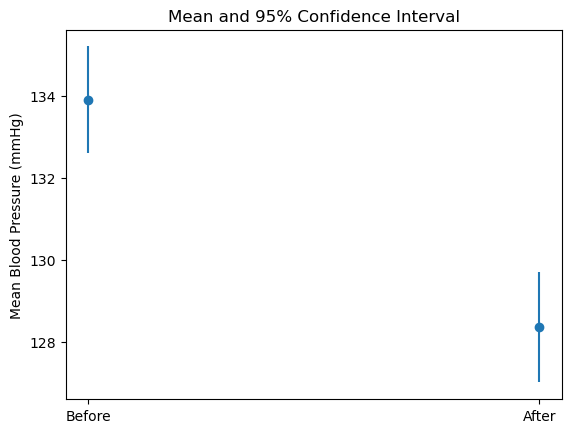

In [40]:
# Plot mean and confidence interval
plt.errorbar([0, 1], [mean_before, mean_after], yerr=[confidence_interval_before[1] - mean_before, confidence_interval_after[1] - mean_after], fmt='o')
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.title('Mean and 95% Confidence Interval')
plt.show()

In [51]:
# Calculate mean absolute deviation and standard deviation
mad_before = df['Blood Pressure Before (mmHg)'].mad()
mad_after = df['Blood Pressure After (mmHg)'].mad()

std_before = df['Blood Pressure Before (mmHg)'].std()
std_after = df['Blood Pressure After (mmHg)'].std()

C:\Users\tusha\AppData\Local\Temp\ipykernel_2704\1777798972.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_before = df['Blood Pressure Before (mmHg)'].mad()
C:\Users\tusha\AppData\Local\Temp\ipykernel_2704\1777798972.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_after = df['Blood Pressure After (mmHg)'].mad()


In [52]:
mad_before,mad_after,std_before,std_after

(5.7118, 5.9, 6.598278012275075, 6.8880221025232276)

In [53]:
# Calculate correlation coefficient and check significance
correlation_coef = df['Blood Pressure Before (mmHg)'].corr(df['Blood Pressure After (mmHg)'])
p_value = stats.pearsonr(df['Blood Pressure Before (mmHg)'], df['Blood Pressure After (mmHg)'])[1]
is_significant = p_value < 0.01

print("Dispersion Before:", dispersion_before)
print("Dispersion After:", dispersion_after)
print("Mean Before:", mean_before)
print("Mean After:", mean_after)
print("Confidence Interval Before:", confidence_interval_before)
print("Confidence Interval After:", confidence_interval_after)
print("Mean Absolute Deviation Before:", mad_before)
print("Mean Absolute Deviation After:", mad_after)
print("Standard Deviation Before:", std_before)
print("Standard Deviation After:", std_after)
print("Correlation Coefficient:", correlation_coef)
print("Significance at 1% level:", is_significant)

Dispersion Before: 28
Dispersion After: 23
Mean Before: 133.91
Mean After: 128.36
Confidence Interval Before: (132.61676127359584, 135.20323872640415)
Confidence Interval After: (127.00997247543387, 129.71002752456616)
Mean Absolute Deviation Before: 5.7118
Mean Absolute Deviation After: 5.9
Standard Deviation Before: 6.598278012275075
Standard Deviation After: 6.8880221025232276
Correlation Coefficient: 0.9779485966556016
Significance at 1% level: True


In [ ]:
'''
Dispersion Before: This is the range of the blood pressure values before the intervention. It represents the difference between the maximum and minimum values of the blood pressure before the intervention.
Dispersion After: This is the range of the blood pressure values after the intervention. It represents the difference between the maximum and minimum values of the blood pressure after the intervention.
Mean Before: This is the average blood pressure value before the intervention. It represents the central tendency of the blood pressure values before the intervention.
Mean After: This is the average blood pressure value after the intervention. It represents the central tendency of the blood pressure values after the intervention.
Confidence Interval Before: This is the confidence interval estimate for the mean blood pressure before the intervention. It provides a range within which the true population mean is likely to fall with a certain level of confidence (in this case, 95% confidence).
Confidence Interval After: This is the confidence interval estimate for the mean blood pressure after the intervention. It provides a range within which the true population mean is likely to fall with a certain level of confidence (in this case, 95% confidence).
Mean Absolute Deviation Before: This is the average absolute difference between each blood pressure value before the intervention and the mean before the intervention. It measures the average dispersion of the blood pressure values around the mean before the intervention.
Mean Absolute Deviation After: This is the average absolute difference between each blood pressure value after the intervention and the mean after the intervention. It measures the average dispersion of the blood pressure values around the mean after the intervention.
Standard Deviation Before: This is a measure of the dispersion or spread of the blood pressure values before the intervention. It quantifies how much the blood pressure values deviate from the mean before the intervention.
Standard Deviation After: This is a measure of the dispersion or spread of the blood pressure values after the intervention. It quantifies how much the blood pressure values deviate from the mean after the intervention.
Correlation Coefficient: This is a measure of the strength and direction of the linear relationship between the blood pressure values before and after the intervention. It ranges from -1 to 1, where values closer to 1 indicate a strong positive correlation, values closer to -1 indicate a strong negative correlation, and values close to 0 indicate a weak or no correlation.
Significance at 1% level: This indicates whether the correlation coefficient is statistically significant at the 1% level. In other words, it determines if the observed correlation is likely to have occurred by chance or if it is a meaningful relationship. If the p-value is less than 0.01, we can reject the null hypothesis and conclude that there is a significant correlation between the blood pressure values before and after the intervention.'''